In [4]:
# Assignment 3 - Simple Neural Network (FNN) on MNIST
# Using scikit-learn for a basic feedforward neural network

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
# Load the MNIST dataset from OpenML
# Each image is already flattened into 784 features (28x28)

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(int)

print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


In [6]:
# Normalize pixel values so everything is between 0 and 1
# This helps the neural network train more smoothly
X = X.astype("float32") / 255.0

# One-hot encoding is common in neural networks
# scikit-learn doesn't require it, but I included it to match the concept
y_onehot = np.eye(10)[y]

print("Pixel range:", X.min(), "to", X.max())
print("One-hot shape:", y_onehot.shape)


Pixel range: 0.0 to 1.0
One-hot shape: (70000, 10)


In [7]:
# Split the data into training and testing sets
# 80% for training, 20% for testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(56000, 784) (14000, 784)


In [8]:
# This is a feedforward neural network (MLP)
# Two hidden layers using ReLU, trained with Adam

model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=10,      # small number so it trains quickly
    batch_size=128,
    random_state=42,
    verbose=True
)

model


,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,128
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,10
,shuffle,True
,random_state,42


In [9]:
# Train the model on the training data
model.fit(X_train, y_train)


Iteration 1, loss = 0.33663251
Iteration 2, loss = 0.13366233
Iteration 3, loss = 0.09501947
Iteration 4, loss = 0.07354312
Iteration 5, loss = 0.05598293
Iteration 6, loss = 0.04607938
Iteration 7, loss = 0.03716332
Iteration 8, loss = 0.02946205
Iteration 9, loss = 0.02460101
Iteration 10, loss = 0.01963812


C:\Users\mozog\anaconda3\envs\llm_peft\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,128
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,10
,shuffle,True
,random_state,42


In [10]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy, 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9746

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1381
           1       0.99      0.98      0.99      1575
           2       0.98      0.98      0.98      1398
           3       0.97      0.98      0.97      1428
           4       0.98      0.97      0.97      1365
           5       0.95      0.98      0.96      1263
           6       0.97      0.99      0.98      1375
           7       0.98      0.98      0.98      1459
           8       0.98      0.95      0.96      1365
           9       0.96      0.97      0.96      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



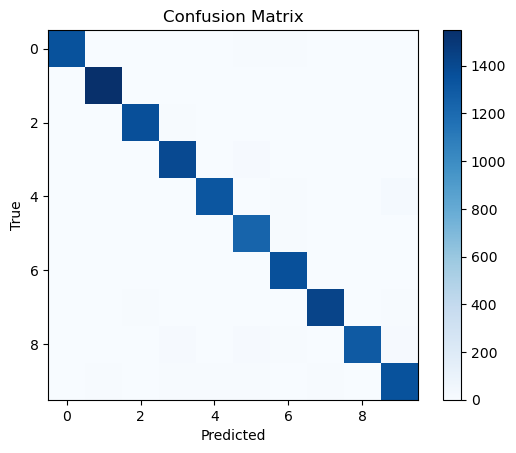

In [11]:
# Confusion matrix to see where the model makes mistakes
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


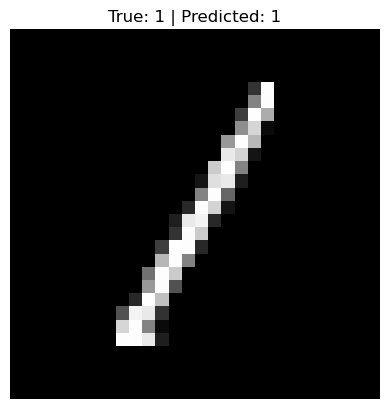

In [12]:
# Pick a random test image and see what the model predicts
idx = np.random.randint(0, X_test.shape[0])

x_vec = X_test[idx]
true_label = y_test[idx]
pred_label = model.predict([x_vec])[0]

plt.imshow(x_vec.reshape(28, 28), cmap="gray")
plt.title(f"True: {true_label} | Predicted: {pred_label}")
plt.axis("off")
plt.show()
